<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%209/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-x3ffca85
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-x3ffca85
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=5a49849d77aba573d0b6957f41c6f344d72699b247e04f9e62ed00b55f4967ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-mfseq345/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


In [2]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [0]:
# import autoreload
# %load_ext autoreload
# %autoreload

In [0]:
import sys
folder = '/content/gdrive/My Drive/Colab Notebooks/s9'
sys.path.append(folder)

In [0]:
%matplotlib inline
import torch
import data_loading
import show_images
import dnn_architecture
import train_and_test
import evaluate
import gradcam

In [7]:
classes, trainloader, testloader = data_loading.load()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([128, 3, 32, 32])
  cat truck truck   cat


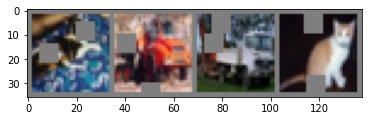

In [8]:
show_images.show_random_images(trainloader, classes)

In [9]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = dnn_architecture.Resnet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
        BasicBlock-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,864
      BatchNorm2d-14           [-1

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR,MultiStepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9,weight_decay=0.0005)
scheduler = MultiStepLR(optimizer, milestones=[10,20,30], gamma=0.1)

In [12]:

EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, 'LR:',optimizer.param_groups[0]['lr'])
    train_and_test.train(model, device, trainloader, optimizer, criterion, epoch)
    scheduler.step()
    train_and_test.test(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.1


Loss=1.7359424829483032 Batch_id=390 Accuracy=25.52: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0133, Accuracy: 3565/10000 (35.65%)

EPOCH: 2 LR: 0.1


Loss=1.6121208667755127 Batch_id=390 Accuracy=43.24: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0113, Accuracy: 4607/10000 (46.07%)

EPOCH: 3 LR: 0.1


Loss=1.1708364486694336 Batch_id=390 Accuracy=52.38: 100%|██████████| 391/391 [00:31<00:00, 12.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0104, Accuracy: 5443/10000 (54.43%)

EPOCH: 4 LR: 0.1


Loss=1.0046497583389282 Batch_id=390 Accuracy=60.47: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 6504/10000 (65.04%)

EPOCH: 5 LR: 0.1


Loss=0.8361212611198425 Batch_id=390 Accuracy=65.74: 100%|██████████| 391/391 [00:31<00:00, 12.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 6635/10000 (66.35%)

EPOCH: 6 LR: 0.1


Loss=0.6972836256027222 Batch_id=390 Accuracy=70.22: 100%|██████████| 391/391 [00:31<00:00, 12.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7408/10000 (74.08%)

EPOCH: 7 LR: 0.1


Loss=0.6785466074943542 Batch_id=390 Accuracy=74.14: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7432/10000 (74.32%)

EPOCH: 8 LR: 0.1


Loss=0.9436772465705872 Batch_id=390 Accuracy=75.98: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7363/10000 (73.63%)

EPOCH: 9 LR: 0.1


Loss=0.6536705493927002 Batch_id=390 Accuracy=77.68: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7726/10000 (77.26%)

EPOCH: 10 LR: 0.1


Loss=0.701045036315918 Batch_id=390 Accuracy=78.90: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 7268/10000 (72.68%)

EPOCH: 11 LR: 0.010000000000000002


Loss=0.3995211720466614 Batch_id=390 Accuracy=85.38: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8664/10000 (86.64%)

EPOCH: 12 LR: 0.010000000000000002


Loss=0.34266984462738037 Batch_id=390 Accuracy=87.35: 100%|██████████| 391/391 [00:31<00:00, 12.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8719/10000 (87.19%)

EPOCH: 13 LR: 0.010000000000000002


Loss=0.33871689438819885 Batch_id=390 Accuracy=88.47: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8785/10000 (87.85%)

EPOCH: 14 LR: 0.010000000000000002


Loss=0.3794962167739868 Batch_id=390 Accuracy=89.44: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8848/10000 (88.48%)

EPOCH: 15 LR: 0.010000000000000002


Loss=0.19561976194381714 Batch_id=390 Accuracy=90.04: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8827/10000 (88.27%)

EPOCH: 16 LR: 0.010000000000000002


Loss=0.14410920441150665 Batch_id=390 Accuracy=90.77: 100%|██████████| 391/391 [00:31<00:00, 12.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8834/10000 (88.34%)

EPOCH: 17 LR: 0.010000000000000002


Loss=0.224592924118042 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8848/10000 (88.48%)

EPOCH: 18 LR: 0.010000000000000002


Loss=0.2452249974012375 Batch_id=390 Accuracy=91.87: 100%|██████████| 391/391 [00:31<00:00, 12.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8812/10000 (88.12%)

EPOCH: 19 LR: 0.010000000000000002


Loss=0.21678347885608673 Batch_id=390 Accuracy=92.16: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8891/10000 (88.91%)

EPOCH: 20 LR: 0.010000000000000002


Loss=0.2292558252811432 Batch_id=390 Accuracy=92.68: 100%|██████████| 391/391 [00:31<00:00, 12.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8890/10000 (88.90%)

EPOCH: 21 LR: 0.0010000000000000002


Loss=0.18527600169181824 Batch_id=390 Accuracy=94.55: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8993/10000 (89.93%)

EPOCH: 22 LR: 0.0010000000000000002


Loss=0.13563823699951172 Batch_id=390 Accuracy=95.02: 100%|██████████| 391/391 [00:31<00:00, 12.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8997/10000 (89.97%)

EPOCH: 23 LR: 0.0010000000000000002


Loss=0.2768263816833496 Batch_id=390 Accuracy=95.24: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9004/10000 (90.04%)

EPOCH: 24 LR: 0.0010000000000000002


Loss=0.163148432970047 Batch_id=390 Accuracy=95.44: 100%|██████████| 391/391 [00:30<00:00, 12.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9014/10000 (90.14%)

EPOCH: 25 LR: 0.0010000000000000002


Loss=0.06990820914506912 Batch_id=390 Accuracy=95.74: 100%|██████████| 391/391 [00:30<00:00, 12.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 9010/10000 (90.10%)

EPOCH: 26 LR: 0.0010000000000000002


Loss=0.08991524577140808 Batch_id=390 Accuracy=95.89: 100%|██████████| 391/391 [00:30<00:00, 12.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 9029/10000 (90.29%)

EPOCH: 27 LR: 0.0010000000000000002


Loss=0.10600076615810394 Batch_id=390 Accuracy=95.93: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9023/10000 (90.23%)

EPOCH: 28 LR: 0.0010000000000000002


Loss=0.19135697185993195 Batch_id=390 Accuracy=96.01: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8999/10000 (89.99%)

EPOCH: 29 LR: 0.0010000000000000002


Loss=0.13804200291633606 Batch_id=390 Accuracy=96.19: 100%|██████████| 391/391 [00:30<00:00, 12.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 9018/10000 (90.18%)

EPOCH: 30 LR: 0.0010000000000000002


Loss=0.1734265387058258 Batch_id=390 Accuracy=96.38: 100%|██████████| 391/391 [00:30<00:00, 12.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9039/10000 (90.39%)

EPOCH: 31 LR: 0.00010000000000000003


Loss=0.10337714850902557 Batch_id=390 Accuracy=96.57: 100%|██████████| 391/391 [00:30<00:00, 12.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9029/10000 (90.29%)

EPOCH: 32 LR: 0.00010000000000000003


Loss=0.06610433757305145 Batch_id=390 Accuracy=96.53: 100%|██████████| 391/391 [00:30<00:00, 12.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9021/10000 (90.21%)

EPOCH: 33 LR: 0.00010000000000000003


Loss=0.051046449691057205 Batch_id=390 Accuracy=96.51: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9035/10000 (90.35%)

EPOCH: 34 LR: 0.00010000000000000003


Loss=0.09828904271125793 Batch_id=390 Accuracy=96.70: 100%|██████████| 391/391 [00:30<00:00, 12.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9049/10000 (90.49%)

EPOCH: 35 LR: 0.00010000000000000003


Loss=0.1024860143661499 Batch_id=390 Accuracy=96.48: 100%|██████████| 391/391 [00:30<00:00, 12.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9042/10000 (90.42%)

EPOCH: 36 LR: 0.00010000000000000003


Loss=0.18877694010734558 Batch_id=390 Accuracy=96.55: 100%|██████████| 391/391 [00:30<00:00, 12.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9030/10000 (90.30%)

EPOCH: 37 LR: 0.00010000000000000003


Loss=0.1779482364654541 Batch_id=390 Accuracy=96.67: 100%|██████████| 391/391 [00:30<00:00, 12.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9041/10000 (90.41%)

EPOCH: 38 LR: 0.00010000000000000003


Loss=0.19075480103492737 Batch_id=390 Accuracy=96.64: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 9038/10000 (90.38%)

EPOCH: 39 LR: 0.00010000000000000003


Loss=0.1036919504404068 Batch_id=390 Accuracy=96.62: 100%|██████████| 391/391 [00:30<00:00, 12.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9036/10000 (90.36%)

EPOCH: 40 LR: 0.00010000000000000003


Loss=0.08021806180477142 Batch_id=390 Accuracy=96.73: 100%|██████████| 391/391 [00:30<00:00, 12.71it/s]



Test set: Average loss: 0.0025, Accuracy: 9038/10000 (90.38%)



GroundTruth:    car  bird  frog  deer  bird
Predicted:    car  bird  frog  deer  bird


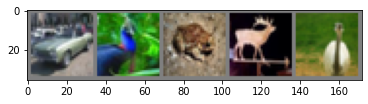

In [13]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [14]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 90 %


In [15]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 88 %
Accuracy of   car : 97 %
Accuracy of  bird : 87 %
Accuracy of   cat : 69 %
Accuracy of  deer : 96 %
Accuracy of   dog : 86 %
Accuracy of  frog : 92 %
Accuracy of horse : 96 %
Accuracy of  ship : 90 %
Accuracy of truck : 86 %


In [0]:
target_layers = ["layer1","layer2","layer3","layer4"]
gradcam = gradcam.VisualizeCam(model,classes, target_layers)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

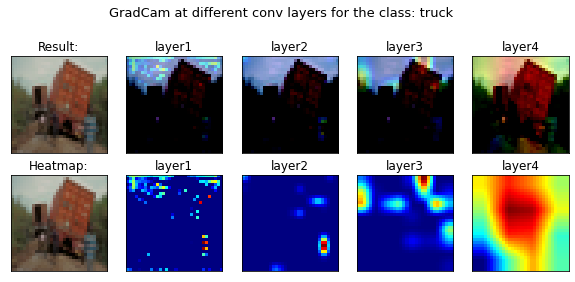

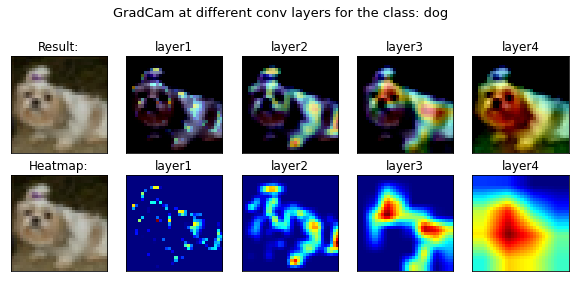

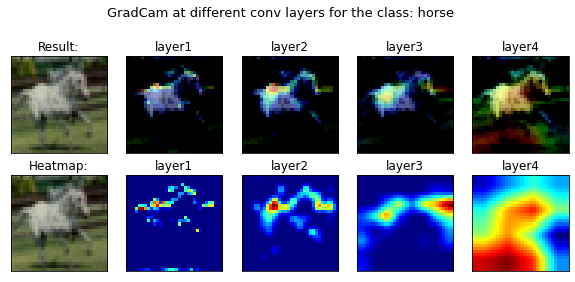

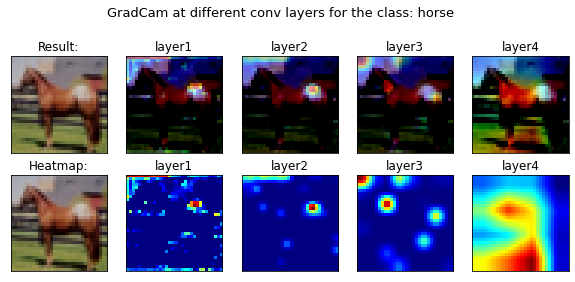

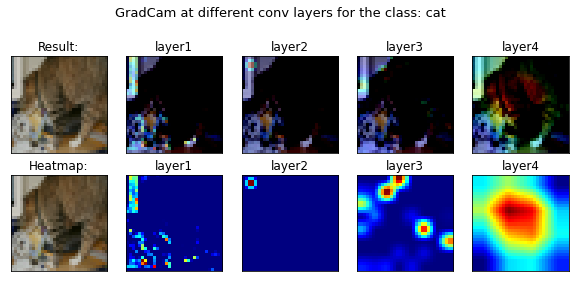

In [26]:
imgs,labels = next(iter(testloader))
images = []
for i in range(5):
  images.append(imgs[i]*2-0.5)

gradcam(torch.stack(images), target_layers)